<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/Day_13_Pipeline_with_slector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Load dataset
digits = load_digits()

# Base model for feature importance
rf = RandomForestClassifier(random_state=42)#used the random state 42 for reperduce resultes dont use this for actual testing of the models

# Use feature selection based on importance
selector = SelectFromModel(rf, threshold="median")
# keeps only the features with importance >= median

# Pipeline: feature selection + model
pipe = Pipeline([
    ('select', selector),
    ('rf', rf)
])

# GridSearch over RF parameters
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, 30]   # we could have threshold tha means the meaninum % of importance a column should have like threshold=0.01 thats means importen of colums for data set should be atleast 0.01%
}                                    # dont put the threshold to high coz it can drop the usefull feactures too

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(digits.data, digits.target)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)
print("Number of features selected:", grid.best_estimator_['select'].transform(digits.data).shape[1]) #the (.transform) transform the old data set to new one that have only the slected columns


Best parameters: {'rf__max_depth': 20, 'rf__n_estimators': 100}
Best CV score: 0.933242030331167
Number of features selected: 32


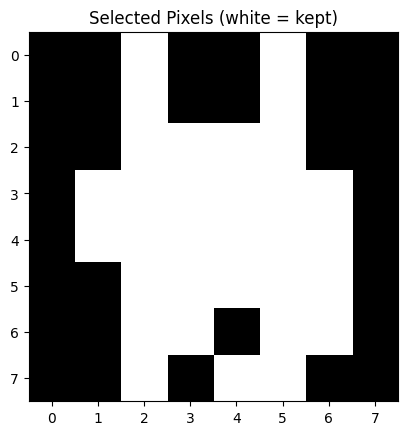

In [5]:
#vislual of what pixels slector keeped and droped
import matplotlib.pyplot as plt
import numpy as np

# Get the selector from the best pipeline
selector = grid.best_estimator_['select']

# Boolean mask of selected features (True = kept, False = dropped)
mask = selector.get_support()

# Reshape into 8x8 (digits image size)
mask_img = mask.reshape(8, 8)

plt.imshow(mask_img, cmap="gray")
plt.title("Selected Pixels (white = kept)")
plt.show()


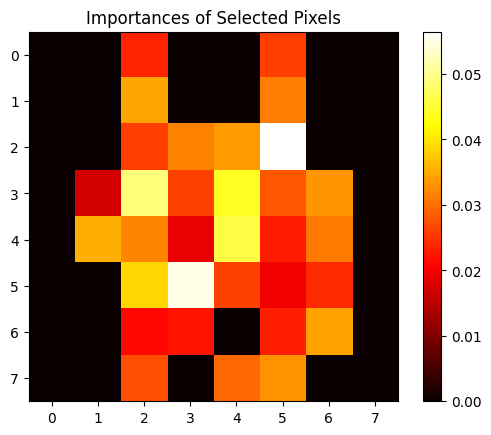

In [4]:
# Get feature importances from the selected RF
importances = grid.best_estimator_['rf'].feature_importances_

# Get the original mask from the selector
original_mask = grid.best_estimator_['select'].get_support()

# Create an array with importances for all original features
all_importances = np.zeros_like(original_mask, dtype=float)
all_importances[original_mask] = importances

# Mask non-selected pixels using the original mask
masked_importances = np.zeros_like(all_importances)
masked_importances[mask] = all_importances[mask]

plt.imshow(masked_importances.reshape(8, 8), cmap="hot")
plt.colorbar()
plt.title("Importances of Selected Pixels")
plt.show()